# **Load Libraries**

In [ ]:
#used to reload block diagrams
import numpy as np                    #for multi-dimentional containters
import pandas as pd                   #for dataframes
import plotly.graph_objects as go     #for data visualization
import random
import copy
import matplotlib.pyplot as plt

# **How does Genetic Algorithm Work?**

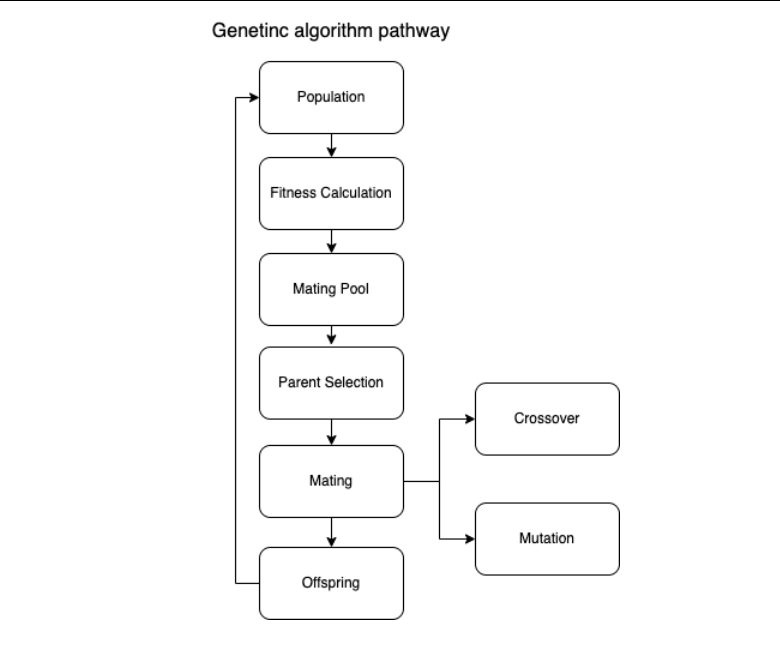

In [ ]:
# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "SPHERE!"

class Individual(object):
	'''
	Class representing individual in population
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''

		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#current generation
	generation = 1

	found = False
	population = []

	# create initial population
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x.fitness)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0].fitness <= 0:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.mate(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".\
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".\
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()

Generation: 1	String: 5PHf #M	Fitness: 5
Generation: 2	String: 5PHf #M	Fitness: 5
Generation: 3	String: 5PHf #M	Fitness: 5
Generation: 4	String: SPNFRaS	Fitness: 4
Generation: 5	String: SPNFRaS	Fitness: 4
Generation: 6	String: SPHTR5]	Fitness: 3
Generation: 7	String: SPH(R5!	Fitness: 2
Generation: 8	String: SPH(R5!	Fitness: 2
Generation: 9	String: SPH(R5!	Fitness: 2
Generation: 10	String: SPHERa!	Fitness: 1
Generation: 11	String: SPHERa!	Fitness: 1
Generation: 12	String: SPHERa!	Fitness: 1
Generation: 13	String: SPHERa!	Fitness: 1
Generation: 14	String: SPHERE!	Fitness: 0



# **Let's optimize to sphere function.**

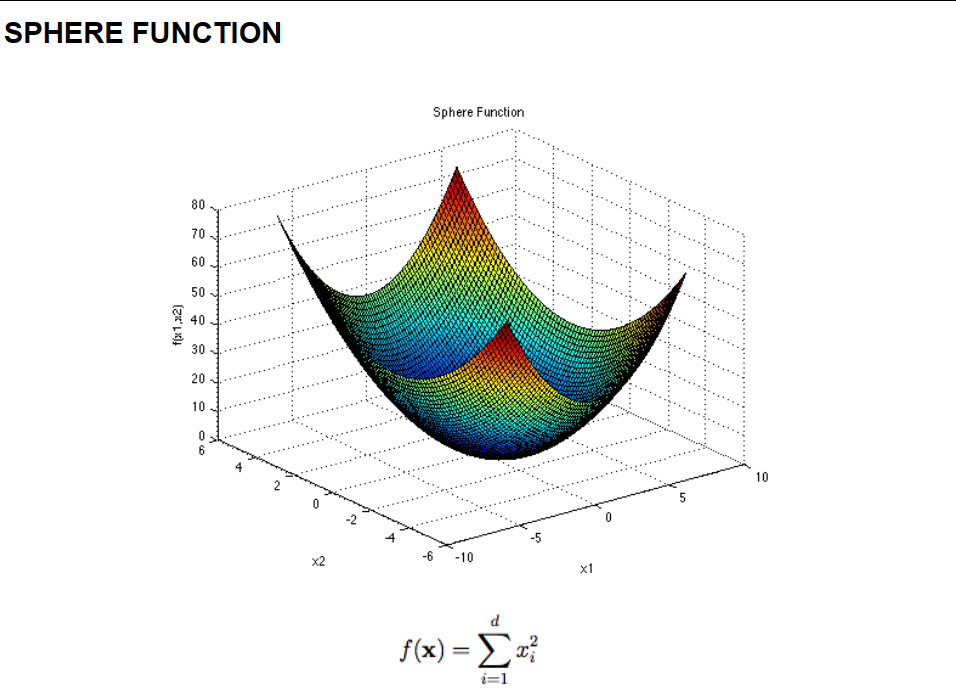

# **Input Domain:**

# The function is usually evaluated on the hypercube xi ∈ [-5.12, 5.12], for all i = 1, …, d.

# **Global Minimum:**


spheref3.png

#**Implement Genetic Algorithm**

##Define the sphere function

In [ ]:
# cost function
def sphere(x):
    return sum(x**2)

#**Tournment selection:**

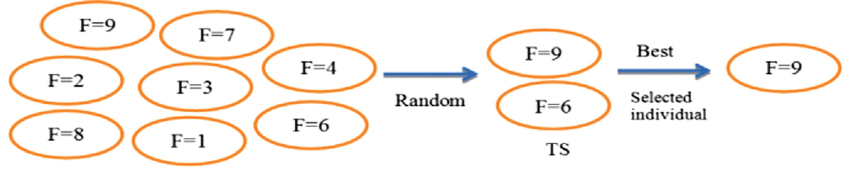

In [ ]:
# Tournament selection function
def tournament_selection(population, tournament_size):
    # Randomly select individuals from the population to compete
    competitors_indices = np.random.choice(len(population), size=tournament_size, replace=False)
    competitors = [population[i] for i in competitors_indices]
    # Find the winner (individual with lowest cost)
    winner = min(competitors, key=lambda x: x['cost'])
    return winner

#**Uniform Crossover**

In [ ]:
# Crossover function
def crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    alpha = np.random.uniform(0, 1, len(c1['position']))
    c1['position'] = alpha * p1['position'] + (1 - alpha) * p2['position']
    c2['position'] = alpha * p2['position'] + (1 - alpha) * p1['position']
    return c1, c2

# **Gaussian mutation**

In [ ]:
# Mutation function
def mutate(c, mu, sigma, varmin, varmax):
    y = copy.deepcopy(c)
    flag = np.random.rand(len(c['position'])) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    y['position'] = np.maximum(y['position'], varmin)
    y['position'] = np.minimum(y['position'], varmax)
    return y

# **Evaluating the Offsprings**

In [ ]:
# GA function
def ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, tournament_size, verbose):
    # Initialize population
    population = [{'position': np.random.uniform(varmin, varmax, num_var), 'cost': None} for _ in range(npop)]

    # Evaluate initial population
    for ind in population:
        ind['cost'] = costfunc(ind['position'])

    # Best solution found
    bestsol = min(population, key=lambda x: x['cost'])

    # Best cost of each generation
    bestcost = np.empty(maxit)

    # Main loop
    for it in range(maxit):
        for _ in range(num_children // 2):
            # Tournament selection for parents
            p1 = tournament_selection(population, tournament_size)
            p2 = tournament_selection(population, tournament_size)

            # Crossover
            c1, c2 = crossover(p1, p2)

            # Mutation
            c1 = mutate(c1, mu, sigma, varmin, varmax)
            c2 = mutate(c2, mu, sigma, varmin, varmax)

            # Evaluate children
            c1['cost'] = costfunc(c1['position'])
            c2['cost'] = costfunc(c2['position'])

            # Update best solution
            if c1['cost'] < bestsol['cost']:
                bestsol = copy.deepcopy(c1)
            if c2['cost'] < bestsol['cost']:
                bestsol = copy.deepcopy(c2)

            # Replace worst individuals in population
            population.append(c1)
            population.append(c2)

        # Evaluate new population
        for ind in population:
            if ind['cost'] is None:
                ind['cost'] = costfunc(ind['position'])

        # Remove individuals with None cost
        population = [ind for ind in population if ind['cost'] is not None]

        # Sort population
        population = sorted(population, key=lambda x: x['cost'])[:npop]

        # Store best cost
        bestcost[it] = bestsol['cost']

        # Show generation information
        if verbose and it % verbose == 0:
            print('Iteration {}: Best Cost = {}'.format(it, bestcost[it]))

    return population, bestsol, bestcost

In [ ]:
# Problem definition
costfunc = sphere
num_var = 5       # Number of decision variables
varmin = -5.12     # Lower bound
varmax = 5.12     # Upper bound

# GA parameters
maxit = 500       # Number of iterations
npop = 20         # Initial population size
num_children = 40 # Proportion of children to population
mu = 0.2          # Mutation rate
sigma = 0.2       # Step size of mutation
tournament_size = 5 # Tournament size for selection
verbose = 100     # Print frequency

#**Visualize the results**

Iteration 0: Best Cost = 2.5582149497893756
Iteration 100: Best Cost = 2.6141857034053796e-06
Iteration 200: Best Cost = 1.0519304950169068e-06
Iteration 300: Best Cost = 4.051822620244753e-07
Iteration 400: Best Cost = 4.051822620244753e-07


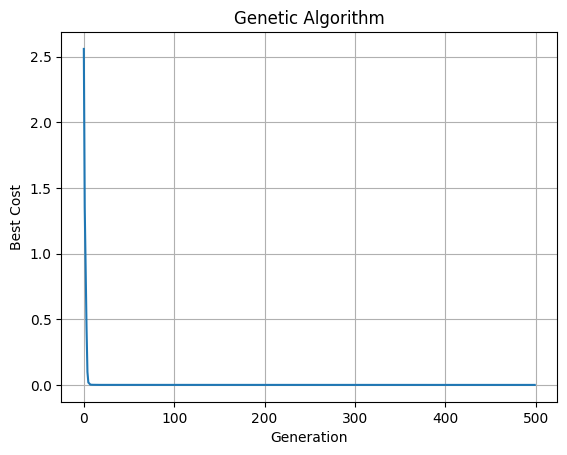

In [ ]:
# Run GA
population, bestsol, bestcost = ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, tournament_size, verbose)

# Plot results
import matplotlib.pyplot as plt
plt.plot(bestcost)
plt.xlabel('Generation')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show()